<h1> Problem Set 6 </h1> 
<h3> Akshita Gundavarapu </h3>

<h2> 1 Who will win the elections? </h2> 

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

<h3> 1.1 </h3> 

In [190]:
us = pd.read_csv("data /us-elections_2000-2020.csv", sep= "\t")
us.head(3)

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south


In [191]:
us.shape

(37390, 22)

In [129]:
us.describe()

,FIPS,year,candidatevotes,totalvotes,income,population,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D
count,37390.000000,37390.000000,3.738600e+04,3.739000e+04,30628.000000,3.062800e+04,37390.000000,3.739000e+04,3.739000e+04,3.739000e+04,3.739000e+04,3.739000e+04,3.739000e+04,3.739000e+04,37390.000000
mean,30636.119016,2009.997325,2.034252e+04,4.177089e+04,32736.029711,1.040629e+05,1027.584150,6.880577e+03,6.676769e+04,1.041203e+05,7.505244e+04,1.331304e+04,5.084033e+03,1.710746e+04,8344.133779
std,14997.970841,6.829930,6.298553e+04,1.212534e+05,10972.450212,4.682149e+05,1621.781281,3.770606e+04,2.926759e+05,4.450238e+05,2.799262e+05,7.410267e+04,4.279641e+04,1.287140e+05,37374.898579
min,1001.000000,2000.000000,4.000000e+00,0.000000e+00,10254.000000,5.500000e+01,0.000000,0.000000e+00,7.700000e+01,8.200000e+01,6.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-135313.000000
25%,19035.000000,2004.000000,2.135250e+03,4.890250e+03,25301.000000,1.120800e+04,444.540000,3.230000e+02,7.525000e+03,1.129900e+04,9.211000e+03,7.700000e+01,3.300000e+01,2.680000e+02,-483.000000
50%,29207.000000,2008.000000,5.132000e+03,1.083900e+04,30913.500000,2.563800e+04,647.280000,8.640000e+02,1.709800e+04,2.602600e+04,2.192400e+04,7.450000e+02,1.190000e+02,8.990000e+02,305.000000
75%,46005.000000,2016.000000,1.385325e+04,2.852550e+04,37842.000000,6.619800e+04,976.150000,2.937000e+03,4.322200e+04,6.709100e+04,5.670000e+04,5.506000e+03,6.390000e+02,4.272000e+03,3751.000000
max,56045.000000,2020.000000,3.028885e+06,4.263443e+06,205843.000000,1.963343e+07,54556.000000,1.778669e+06,1.304768e+07,1.937810e+07,1.274097e+07,3.073800e+06,1.420244e+06,4.687889e+06,950964.000000


<h3> 1.2 and 1.3 </h3>

In [192]:
us.isna().sum()

FIPS                 0
year                 0
state                0
state2               0
county               0
office               0
candidate            0
party                0
candidatevotes       4
totalvotes           0
income            6762
population        6762
LND010200D           0
EDU695209D           0
EDU600209D           0
POP010210D           0
POP220210D           0
POP250210D           0
POP320210D           0
POP400210D           0
PST110209D           0
region               0
dtype: int64

In [193]:
us_1 = us.sort_values(["income", "population"], ascending = (False, False))
us_1[["income", "population", "county"]]

,income,population,county
37350,205843.0,23234.0,Teton
37351,205843.0,23234.0,Teton
37348,193067.0,21624.0,Teton
37349,193067.0,21624.0,Teton
21982,165782.0,1635443.0,New York
...,...,...,...
37365,NaN,NaN,Uinta County
37376,NaN,NaN,Washakie County
37377,NaN,NaN,Washakie County
37388,NaN,NaN,Weston County


In [194]:
us = us.groupby("FIPS").fillna(method="ffill")
us.isna().sum()

year                0
state               0
state2              0
county              0
office              0
candidate           0
party               0
candidatevotes      2
totalvotes          0
income            644
population        644
LND010200D          0
EDU695209D          0
EDU600209D          0
POP010210D          0
POP220210D          0
POP250210D          0
POP320210D          0
POP400210D          0
PST110209D          0
region              0
dtype: int64

In [195]:
us_2 = us.sort_values(["income", "population"], ascending = (False, False))
us_2[["income", "population", "county"]]

,income,population,county
37350,205843.0,23234.0,Teton
37351,205843.0,23234.0,Teton
37352,205843.0,23234.0,Teton County
37353,205843.0,23234.0,Teton County
37348,193067.0,21624.0,Teton
...,...,...,...
35117,NaN,NaN,Winchester
35118,NaN,NaN,Winchester
35119,NaN,NaN,Winchester
35120,NaN,NaN,Winchester city


<h3> 1.4 </h3> 
If you did this correctly, then even after filling in NA-s there are a few cases missing. What is going on? Explain!


This is probably because there may be no earlier values availible to fill the missing values, so they would be left as NaN.

<h3> 1.5 </h3> 


In [495]:
us_2020 = us[us["year"] == 2020]
us_democrats_20 = us_2020[us_2020["party"] == "democrat"]
us_republicans_20 = us_2020[us_2020["party"] == "republican"]

x = us_democrats_20.candidatevotes
y = us_republicans_20.candidatevotes

us_democrats_20["win"] = (x.values >= y.values)
pd.options.mode.chained_assignment = None

us_democrats_20.head()

,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,income,...,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region,win
11,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,39883.0,...,2285,31469,54571,42855,9643,474,1310,7085,south,False
23,2020,Alabama,AL,Baldwin County,President,Joshep Biden,democrat,24578.0,109679,43143.0,...,10855,118585,182265,156153,17105,1348,7992,39463,south,False
35,2020,Alabama,AL,Barbour County,President,Joshep Biden,democrat,4816.0,10518,31932.0,...,1048,19791,27457,13180,12875,107,1387,699,south,False
47,2020,Alabama,AL,Bibb County,President,Joshep Biden,democrat,1986.0,9595,28976.0,...,464,14489,22915,17381,5047,22,406,1698,south,False
59,2020,Alabama,AL,Blount County,President,Joshep Biden,democrat,2640.0,27588,32902.0,...,1561,38472,57322,53068,761,117,4626,7323,south,False


<h3> 1.6 </h3> 

In [496]:
us_democrats_20["population_density"] = (us_democrats_20.population/us_democrats_20.LND010200D)
us_democrats_20["education_level"] = (us_democrats_20.EDU695209D/ us_democrats_20.EDU600209D)*100
us_democrats_20.head()

,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,income,...,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region,win,population_density,education_level
11,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,39883.0,...,54571,42855,9643,474,1310,7085,south,False,91.393829,7.261114
23,2020,Alabama,AL,Baldwin County,President,Joshep Biden,democrat,24578.0,109679,43143.0,...,182265,156153,17105,1348,7992,39463,south,False,102.421396,9.153772
35,2020,Alabama,AL,Barbour County,President,Joshep Biden,democrat,4816.0,10518,31932.0,...,27457,13180,12875,107,1387,699,south,False,28.530049,5.295336
47,2020,Alabama,AL,Bibb County,President,Joshep Biden,democrat,1986.0,9595,28976.0,...,22915,17381,5047,22,406,1698,south,False,36.070653,3.202429
59,2020,Alabama,AL,Blount County,President,Joshep Biden,democrat,2640.0,27588,32902.0,...,57322,53068,761,117,4626,7323,south,False,88.370735,4.057496


<h3> 1.7 </h3> 

In [497]:
us_democrats_20.population_density.describe(), us_democrats_20.education_level.describe()

(count    3059.000000
 mean             inf
 std              NaN
 min         0.172860
 25%        16.357382
 50%        41.793457
 75%       104.347421
 max              inf
 Name: population_density, dtype: float64,
 count    3111.000000
 mean        6.334565
 std         3.789050
 min         0.000000
 25%         3.980849
 50%         5.216220
 75%         7.494790
 max        38.463649
 Name: education_level, dtype: float64)

In [498]:
us_democrats_20 = us_democrats_20[us_democrats_20["population_density"] < 1000_000]
us_denocrats_20 = us_democrats_20[us_democrats_20["education_level"] > 0]

In [499]:
us_democrats_20.population_density.describe()

count     3058.000000
mean       207.528610
std       1264.632603
min          0.172860
25%         16.354756
50%         41.791863
75%        104.194245
max      48428.871780
Name: population_density, dtype: float64

<h3> 1.8 </h3> 

In [500]:
W = us_democrats_20.win.astype(int)
m = smf.logit("W ~ population_density + education_level + income + region", data = us_democrats_20).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.305261
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      W   No. Observations:                 3058
Model:                          Logit   Df Residuals:                     3051
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Feb 2022   Pseudo R-squ.:                  0.3228
Time:                        07:29:56   Log-Likelihood:                -933.49
converged:                       True   LL-Null:                       -1378.4
Covariance Type:            nonrobust   LLR p-value:                6.244e-189
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.6882      0.289    -12.744      0.000      -4.255      -3.121
region[T.northeast]     1.2872      0.220      5.856      0.000       0.856       1.718
region[T.south]         0.6103      0.164      3.710      0.000       0.288       0.933
region[T.west]          1.5085      0.187      8.085      0.000       1.143       1.874
population_density      0.0024      0.000      9.434      0.000       0.002       0.003
education_level         0.2817      0.022     12.694      0.000       0.238       0.325
income              -2.664e-05   7.19e-06     -3.706      0.000   -4.07e-05   -1.26e-05
=======================================================================================
"""

In [501]:
m.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      W
Method:                          dydx
At:                           overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
region[T.northeast]     0.1151      0.020      5.888      0.000       0.077       0.153
region[T.south]         0.0546      0.015      3.708      0.000       0.026       0.083
region[T.west]          0.1349      0.017      8.145      0.000       0.102       0.167
population_density      0.0002   2.23e-05      9.805      0.000       0.000       0.000
education_level         0.0252      0.002     13.493      0.000       0.022       0.029
income              -2.382e-06   6.41e-07     -3.717      0.000   -3.64e-06   -1.13e-06
=======================================================================================
"""

<h3> 1.9 </h3> 
Interpret the results. Which results are statistically significant?
Note: you may want to change some of the units, e.g. you may want to measure population density in 1000/per sq mi, instead of persons per sq mi.


When education level increases by 1 unit the chances of democrats winning increases by 2.52 percent points (in average) given that all other variables remain the same. 

When population density increases by 1000 person/ sq mi the chances of democrats winning increases by 20 percent points (in average) given that all other variables remain the same. 

When income increases by 1 unit the chances of democrats winning decreases by a very small amount given that all other variables remain the same. 

In the noretheast region thye chances of democrats winning increases by 11.51 percent points (in average) given that other varaibles remain the same. 

In the south region thye chances of democrats winning increases by 5.46 percent points (in average) given that other varaibles remain the same. 

In the west region thye chances of democrats winning increases by 13.49 percent points (in average) given that other varaibles remain the same. 




<h2> 2 Model AirBnB Price </h2>
<h3> 2.1 </h3> 

In [477]:
air = pd.read_csv("data /airbnb-beijing-listings.csv", sep= ",", 
                  usecols = ['price', 'bedrooms', 'bathrooms', 'room_type', 'accommodates'])
air

,room_type,accommodates,bathrooms,bedrooms,price
0,Entire home/apt,9,2.0,3.0,$831.00
1,Private room,2,1.0,1.0,"$1,197.00"
2,Entire home/apt,2,1.0,1.0,$598.00
3,Entire home/apt,2,1.0,1.0,$598.00
4,Entire home/apt,2,1.0,1.0,$598.00
...,...,...,...,...,...
38809,Private room,2,1.0,1.0,$598.00
38810,Entire home/apt,8,3.0,4.0,"$2,175.00"
38811,Private room,6,1.0,1.0,$239.00
38812,Private room,4,1.0,1.0,$225.00


In [478]:
air.describe()

,accommodates,bathrooms,bedrooms
count,38814.000000,38807.000000,38700.000000
mean,3.704050,1.387572,1.637132
std,2.984658,1.241333,1.411610
min,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000
75%,4.000000,1.500000,2.000000
max,34.000000,101.500000,50.000000


<h3> 2.2 </h3>

In [479]:
air["price"] = air["price"].str.replace('$','')
air["price"] = air["price"].str.replace(',','')

/tmp/ipykernel_199/3550816272.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  air["price"] = air["price"].str.replace('$','')


In [480]:
air["price"] = pd.to_numeric(air["price"])
air = air[air["price"] > 0]

In [481]:
air.isna().sum()

room_type         0
accommodates      0
bathrooms         7
bedrooms        114
price             0
dtype: int64

In [482]:
air = air.dropna()

In [483]:
air.isna().sum()

room_type       0
accommodates    0
bathrooms       0
bedrooms        0
price           0
dtype: int64

In [484]:
air.describe()

,accommodates,bathrooms,bedrooms,price
count,38686.000000,38686.000000,38686.000000,38686.000000
mean,3.708603,1.388500,1.637285,691.990358
std,2.987363,1.242502,1.411747,1733.078740
min,1.000000,0.000000,0.000000,28.000000
25%,2.000000,1.000000,1.000000,260.000000
50%,2.000000,1.000000,1.000000,401.000000
75%,4.000000,1.500000,2.000000,619.000000
max,34.000000,101.500000,50.000000,71603.000000


<h3> 2.3 </h3>

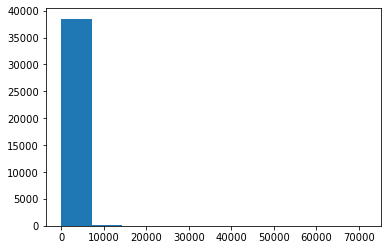

In [485]:
_ = plt.hist(air.price)

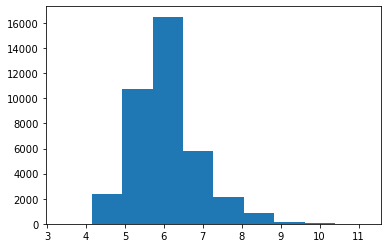

In [486]:
_ = plt.hist(np.log(air.price + 1))

Does it look like normal? Does it look like something else? Does it suggest you should do a log-transformation?

The distribution for price looks extremly right skewed. There seems to be only one large peak. This suggested that I should do a log transformation. 
So, I also made a histogram of log(price). The log(price) distribution seems more normal. 


<h3> 2.4 </h3>

In [487]:
air["beds"] = pd.cut(air.bedrooms,
                      bins = [0, 1, 2, 3, 4, np.inf],
                      labels = ["0", "1", "2", "3", "4+"],
                      right=False)

air


,room_type,accommodates,bathrooms,bedrooms,price,beds
0,Entire home/apt,9,2.0,3.0,831.0,3
1,Private room,2,1.0,1.0,1197.0,1
2,Entire home/apt,2,1.0,1.0,598.0,1
3,Entire home/apt,2,1.0,1.0,598.0,1
4,Entire home/apt,2,1.0,1.0,598.0,1
...,...,...,...,...,...,...
38809,Private room,2,1.0,1.0,598.0,1
38810,Entire home/apt,8,3.0,4.0,2175.0,4+
38811,Private room,6,1.0,1.0,239.0,1
38812,Private room,4,1.0,1.0,225.0,1


<h3> 2.5 </h3> 

In [488]:
m1 = smf.ols("price ~ beds", data = air).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1093.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:17:25   Log-Likelihood:            -3.4133e+05
No. Observations:               38686   AIC:                         6.827e+05
Df Residuals:                   38681   BIC:                         6.827e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.8851    107.166      4.189      0.000     238.837     658.933
beds[T.1]    -11.6223    107.655     -0.108      0.914    -222.628     199.384
beds[T.2]    295.9590    108.801      2.720      0.007      82.705     509.213
beds[T.3]    746.0202    111.966      6.663      0.000     526.565     965.476
beds[T.4+]  2167.8388    111.995     19.357      0.000    1948.326    2387.352
==============================================================================
Omnibus:                    95843.461   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1539629661.103
Skew:                          26.864   Prob(JB):                         0.00
Kurtosis:                     978.842   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results, including R2.

Here the reference category is 0 bedrooms. 

When the number of bedrooms are zero, the price of the air bnb would be 448.9 (in average). 

When the number of bedrooms is 1, the price of the air bnb would be (448.9 - 11.6) 437.3 (in average).

When the number of bedrooms is 2, the price of the air bnb would be (448.9 + 296) 744.9 (in average).

When the number of bedrooms is 3, the price of the air bnb would be (448.9 + 746) 1194.9 (in average).

When the number of bedrooms is 4+, the price of the air bnb would be (448.9 + 2167.8) 2616.7 (in average).

The r-squared value tells us how well the regression model fits the observed data. The r-squared value is 0.102. So 10%  of the data fit the regression model, or 10% of the error can be explained by the regression model. 




<h3> 2.6 </h3> 

In [489]:
P = np.log(air.price+1)
m1 = smf.ols("P ~ beds", data = air).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     4569.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:17:36   Log-Likelihood:                -39971.
No. Observations:               38686   AIC:                         7.995e+04
Df Residuals:                   38681   BIC:                         8.000e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8154      0.044    131.098      0.000       5.728       5.902
beds[T.1]     -0.0323      0.045     -0.724      0.469      -0.120       0.055
beds[T.2]      0.5289      0.045     11.744      0.000       0.441       0.617
beds[T.3]      0.9374      0.046     20.226      0.000       0.847       1.028
beds[T.4+]     1.5906      0.046     34.311      0.000       1.500       1.681
==============================================================================
Omnibus:                     3928.170   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17142.167
Skew:                           0.425   Prob(JB):                         0.00
Kurtosis:                       6.148   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here the reference category is 0 bedrooms. 

When the number of bedrooms are zero, the log(price) of the air bnb would be 5.8 (in average). 

When the number of bedrooms is 1, the log(price) of the air bnb would be (5.9 - 0.03) 5.87 (in average).

When the number of bedrooms is 2, the log(price) of the air bnb would be (5.9 + 0.045) 5.945 (in average).

When the number of bedrooms is 3, the log(price) of the air bnb would be (5.9 + 0.94) 6.84 (in average).

When the number of bedrooms is 4+, the log(price) of the air bnb would be (5.9 + 1.6) 6.5 (in average).

The r-squared value tells us how well the regression model fits the observed data. The r-squared value is 0.32. So 32%  of the data fit the regression model, or 32% of the error can be explained by the regression model. 

Overall, the log(price) model is the better model.


<h3> 2.7 </h3> 

In [490]:
air["accommodates_cut"] = pd.cut(air.accommodates,
                      bins = [1, 2, 3, 4, np.inf],
                      labels = ["1", "2", "3", "4+"],
                      right= False)
air


,room_type,accommodates,bathrooms,bedrooms,price,beds,accommodates_cut
0,Entire home/apt,9,2.0,3.0,831.0,3,4+
1,Private room,2,1.0,1.0,1197.0,1,2
2,Entire home/apt,2,1.0,1.0,598.0,1,2
3,Entire home/apt,2,1.0,1.0,598.0,1,2
4,Entire home/apt,2,1.0,1.0,598.0,1,2
...,...,...,...,...,...,...,...
38809,Private room,2,1.0,1.0,598.0,1,2
38810,Entire home/apt,8,3.0,4.0,2175.0,4+,4+
38811,Private room,6,1.0,1.0,239.0,1,4+
38812,Private room,4,1.0,1.0,225.0,1,4+


In [491]:
air["bath"] = round(air.bathrooms)
air["bath"] = pd.cut(air.bath,
                      bins = [1, 2, 3, np.inf],
                      labels = ["1", "2", "3+"],
                      right= False)
air

,room_type,accommodates,bathrooms,bedrooms,price,beds,accommodates_cut,bath
0,Entire home/apt,9,2.0,3.0,831.0,3,4+,2
1,Private room,2,1.0,1.0,1197.0,1,2,1
2,Entire home/apt,2,1.0,1.0,598.0,1,2,1
3,Entire home/apt,2,1.0,1.0,598.0,1,2,1
4,Entire home/apt,2,1.0,1.0,598.0,1,2,1
...,...,...,...,...,...,...,...,...
38809,Private room,2,1.0,1.0,598.0,1,2,1
38810,Entire home/apt,8,3.0,4.0,2175.0,4+,4+,3+
38811,Private room,6,1.0,1.0,239.0,1,4+,1
38812,Private room,4,1.0,1.0,225.0,1,4+,1


In [492]:
P = np.log(air.price+1)
m2 = smf.ols("P ~ beds + bath + accommodates_cut", data = air).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     2837.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        07:17:44   Log-Likelihood:                -36813.
No. Observations:               38014   AIC:                         7.365e+04
Df Residuals:                   38004   BIC:                         7.373e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5.1731      0.044    118.357      0.000       5.087       5.259
beds[T.1]                 -0.0268      0.042     -0.631      0.528      -0.110       0.056
beds[T.2]                  0.2284      0.043      5.257      0.000       0.143       0.314
beds[T.3]                  0.5364      0.045     11.953      0.000       0.448       0.624
beds[T.4+]                 0.8682      0.047     18.618      0.000       0.777       0.960
bath[T.2]                  0.0061      0.008      0.744      0.457      -0.010       0.022
bath[T.3+]                 0.6059      0.019     31.122      0.000       0.568       0.644
accommodates_cut[T.2]      0.6553      0.013     49.944      0.000       0.630       0.681
accommodates_cut[T.3]      0.7408      0.017     44.520      0.000       0.708       0.773
accommodates_cut[T.4+]     0.9652      0.015     63.089      0.000       0.935       0.995
==============================================================================
Omnibus:                     5243.004   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30844.825
Skew:                           0.527   Prob(JB):                         0.00
Kurtosis:                       7.285   Cond. No.                         40.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret and comment the more interesting/important results. Do not forget to mention what are the relevant reference categories and R2.

The reference categories are 0 bedrooms, 1 bathroom, accomodates 1. 

When the number of bedrooms is 1, the log(price) of the air bnb would be (5.17 - 0.03) 5.14 (in average) given that all other variables remain the same.

When the number of bedrooms is 2, the log(price) of the air bnb would be (5.17 + 0.23) 5.4 (in average) given that all other variables remain the same.

When the number of bedrooms is 3, the log(price) of the air bnb would be (5.17 + 0.54) 5.71 (in average) given that all other variables remain the same.

When the number of bedrooms is 4+, the log(price) of the air bnb would be (5.17 + 0.87) 6.04 (in average) given that all other variables remain the same.

When the number of bathrooms is 2, the log(price) of the air bnb would be (5.17 + 0.006) 5.176 (in average) given that all other variables remain the same.

When the number of bathrooms is 3+, the log(price) of the air bnb would be (5.17 + 0.61) 5.78 (in average) given that all other variables remain the same.

When the airbnb accomodates 2, the log(price) of the air bnb would be (5.17 + 0.66) 5.83 (in average) given that all other variables remain the same.

When the airbnb accomodates 3, the log(price) of the air bnb would be (5.17 + 0.74) 5.91 (in average) given that all other variables remain the same.

When the airbnb accomodates 4+, the log(price) of the air bnb would be (5.17 + 0.97) 6.14 (in average) given that all other variables remain the same.

The r-squared value tells us how well the regression model fits the observed data. The r-squared value is 0.40. So 40%  of the data fit the regression model, or 40% of the error can be explained by the regression model. 


<h3> Finally </h3> 

I spent 10 hours on this assignment 